In [1]:
from pathlib import Path

import hydra
from omegaconf import OmegaConf
import matplotlib.pyplot as plt

# Using Hydra

## Introduction: hydra

`hydra` is a Python library we use to load and manage configuration files. It is a powerful tool that allows us to define configuration files in a structured way and load them into our Python code.

To use `hydra`, we need to define a relative path to a configuration file (folder with configuration files) and then load it into our code.



In [2]:
cfg_path = "../../configs" # Path to the config files. Should be relative to the script location!
cfg_name = "test" # Name of the config file to load

There are two ways of loading configuration files using `hydra`:

1. **Imperative API**: This is the most common way of loading configuration files. We use the `OmegaConf` object to load the configuration files and access the configuration parameters.

Use the following code to load a configuration file using the imperative API:

```python
with hydra.initialize(config_path=cfg_path):
    cfg = hydra.compose(config_name=cfg_name)
```

Inside the context manager (`with` block), we can access the configuration parameters using the `cfg` object directly.

2. **Declarative API**: This is a new way of loading configuration files. We use the `@hydra.main()` decorator to load the configuration files and access the configuration parameters.

```python
@hydra.main(config_path=cfg_path, config_name=cfg_name)
def my_app(cfg: DictConfig) -> None:
    pass
```
The `cfg` object is passed as an argument to the function decorated with `@hydra.main()`.

In this notebook, we will be using Imperative API since the Declarative API is not supported in Jupyter notebooks. In scripts, however, you can use the Declarative API to load configuration files.

`hydra.compose()` takes care of loading all the configuration files mentioned in the passed file, and merges them into a single configuration object. It also resolves the configuration parameters and provides a clean interface to access the configuration parameters.

It is called automatically when we use the `@hydra.main()` decorator, but we need to call it explicitly when using the imperative API.

In [41]:
def plot_imgs(data, slice=128):
    print("Data keys:", data.keys())
    if 'name' in data:
        print("Name:", data['name'])
    
    # print shape, type, range, device
    print(f"Image shape: {data['image'].shape}, type: {data['image'].dtype}, range: [{data['image'].min()}, {data['image'].max()}], device: {data['image'].device}")
    print(f"Label shape: {data['label'].shape}, type: {data['label'].dtype}, range: [{data['label'].min()}, {data['label'].max()}], device: {data['label'].device}")


    # if cuda tensor, move to cpu
    if data["image"].is_cuda:
        data["image"] = data["image"].cpu()
    if data["label"].is_cuda:
        data["label"] = data["label"].cpu()
    
    # remove channel dimension
    data["image"] = data["image"].squeeze()
    data["label"] = data["label"].squeeze()
    
    # plot image label
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))
    axes[0].imshow(data["image"][:, slice, :], cmap="gray")
    axes[0].set_title("Image")
    axes[0].axis("off")
    axes[1].imshow(data["label"][:, slice, :], cmap='jet')
    axes[1].set_title("Label")
    axes[1].axis("off")
    plt.show()
    

# Testing different datasets

In [42]:
# define paths to the corresponding config files

cfg_path = "../../configs/dataset"

## Real images dataset

In [43]:
cfg_name = 'testing'

`configs/dataset/testing.yaml` contains following configuration for real images dataset:

```
defaults:
  - transforms/inference

_target_: fetalsyngen.data.datasets.FetalSimpleDataset
bids_path: ./data
sub_list: null
```

See how in the code below we load the configuration file and hydra takes care of loading the `configs/dataset/transforms/inference.yaml` file as well and sets the `transforms` parameter in the configuration object.


Composed config: {'generator': {'_target_': 'fetalsyngen.generator.model.FetalSynthGen', 'shape': [256, 256, 256], 'resolution': [0.5, 0.5, 0.5], 'device': 'cuda', 'intensity_generator': {'_target_': 'fetalsyngen.generator.intensity.rand_gmm.ImageFromSeeds', 'min_subclusters': 1, 'max_subclusters': 3, 'seed_labels': [0, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49], 'generation_classes': [0, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]}, 'spatial_deform': {'_target_': 'fetalsyngen.generator.deformation.affine_nonrigid.SpatialDeformation', 'device': '${..device}', 'size': '${..shape}', 'flip_prb': 0.5, 'max_rotation': 20, 'max_shear': 0.02, 'max_scaling': 0.1, 'nonlinear_transform': True, 'nonlin_scale_min': 0.03, 'nonlin_scale_max': 0.06, 'nonlin_std_max': 4}, 

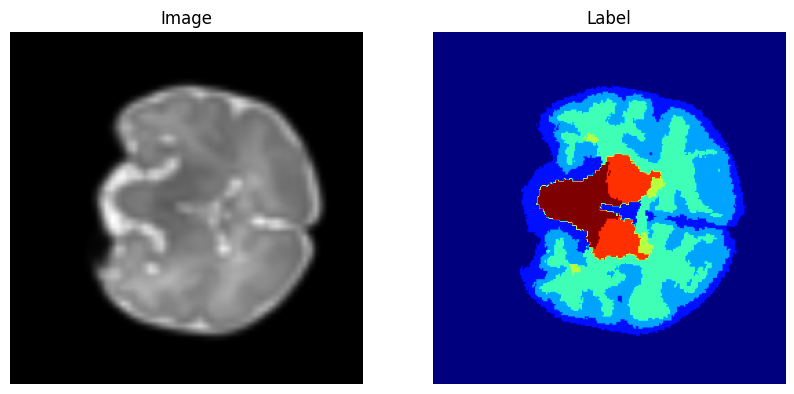

In [48]:
with hydra.initialize(config_path=cfg_path, version_base='1.2'):
    cfg = hydra.compose(config_name=cfg_name)
    print(f'Composed config: {cfg}')
    # print(OmegaConf.to_yaml(cfg))
    cfg.bids_path = './../../data' # update the BIDS path to the relative path from current script location
    dataset = hydra.utils.instantiate(cfg)
    sample = dataset[0]
    plot_imgs(sample)

### Real training images dataset

In [45]:
cfg_name = "real_train"

`configs/dataset/real_train.yaml` contains following configuration for real images dataset:

```
defaults:
  - generator/default

_target_: fetalsyngen.data.datasets.FetalSynthDataset
bids_path: ./data
seed_path: null
sub_list: null
load_image: True
image_as_intensity: True
```

See how in the code below we load the configuration file and hydra takes care of loading the `configs/dataset/generator/default.yaml` file as well and sets the `generator` parameter in the configuration object.


with hydra.initialize(config_path=cfg_path, version_base="1.2"):
    cfg = hydra.compose(config_name=cfg_name)
    print(f"Composed config: {cfg}")
    # print(OmegaConf.to_yaml(cfg))
    cfg.bids_path = "./../../data"  # update the BIDS path to the relative path from current script location
    dataset = hydra.utils.instantiate(cfg)
    sample = dataset[0]
    plot_imgs(sample)

## Synthetic images dataset

In [50]:
cfg_name = "synth_train"

`configs/dataset/synth_train.yaml` contains following configuration for real images dataset:

```
defaults:
  - generator/default

_target_: fetalsyngen.data.datasets.FetalSynthDataset
bids_path: ./data
seed_path: ./data/derivatives/seeds
sub_list: null
load_image: False
image_as_intensity: False
```

See how in the code below we load the configuration file and hydra takes care of loading the `configs/dataset/generator/default.yaml` file as well and sets the `generator` parameter in the configuration object.


Composed config: {'generator': {'_target_': 'fetalsyngen.generator.model.FetalSynthGen', 'shape': [256, 256, 256], 'resolution': [0.5, 0.5, 0.5], 'device': 'cuda', 'intensity_generator': {'_target_': 'fetalsyngen.generator.intensity.rand_gmm.ImageFromSeeds', 'min_subclusters': 1, 'max_subclusters': 3, 'seed_labels': [0, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49], 'generation_classes': [0, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]}, 'spatial_deform': {'_target_': 'fetalsyngen.generator.deformation.affine_nonrigid.SpatialDeformation', 'device': '${..device}', 'size': '${..shape}', 'flip_prb': 0.5, 'max_rotation': 20, 'max_shear': 0.02, 'max_scaling': 0.1, 'nonlinear_transform': True, 'nonlin_scale_min': 0.03, 'nonlin_scale_max': 0.06, 'nonlin_std_max': 4}, 

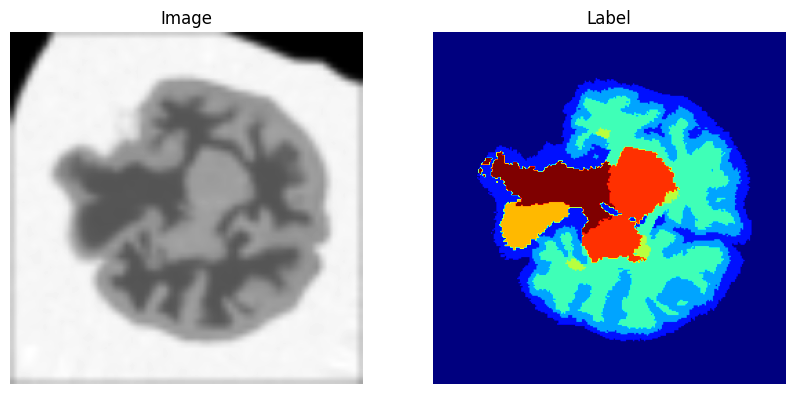

In [53]:
with hydra.initialize(config_path=cfg_path, version_base="1.2"):
    cfg = hydra.compose(config_name=cfg_name)
    cfg.bids_path = "./../../data"  # update the BIDS path to the relative path from current script location
    cfg.seed_path = "./../../data/derivatives/seeds"
    print(f"Composed config: {cfg}")
    # print(OmegaConf.to_yaml(cfg))
    cfg.bids_path = "./../../data"  # update the BIDS path to the relative path from current script location
    dataset = hydra.utils.instantiate(cfg)
    sample = dataset[0]
    plot_imgs(sample)

# Direct instantiation

In [62]:
from fetalsyngen.data.datasets import FetalSynthDataset

from fetalsyngen.generator.model import FetalSynthGen
from fetalsyngen.generator.augmentation.synthseg import RandBiasField, RandGamma, RandNoise, RandResample
from fetalsyngen.generator.deformation.affine_nonrigid import  SpatialDeformation
from fetalsyngen.generator.intensity.rand_gmm import  ImageFromSeeds


intensity_generator = ImageFromSeeds(min_subclusters=1, max_subclusters=3,
                                     seed_labels=[1, 2, 3, 4, 5],
                                     generation_classes=[1, 2, 3, 4, 5],
                                     meta_labels=4)
spatial_deform = SpatialDeformation(max_rotation=10, max_shear=1,max_scaling=1,
                                    size=(256, 256, 256), nonlinear_transform=1,
                                    nonlin_scale_min=1, nonlin_scale_max=1,
                                    nonlin_std_max=1, flip_prb=1, device='cuda')
resampler = RandResample(prob=0.5, max_resolution=1.5, min_resolution=0.5)
bias_field = RandBiasField(prob=0.5, scale_min=0.5, scale_max=1.5, std_min=0.5, std_max=1.5)
noise = RandNoise(prob=0.5, std_min=0.5, std_max=1.5)
gamma = RandGamma(prob=0.5, gamma_std=0.5)

generator = FetalSynthGen(shape=(256, 256, 256),
                          resolution=(0.5, 0.5, 0.5),
                          device='cuda',
                          intensity_generator=intensity_generator,
                          spatial_deform=spatial_deform,
                          resampler=resampler,
                          bias_field=bias_field,
                          noise=noise,
                          gamma=gamma,)

dataset = FetalSynthDataset(bids_path='./../../data', generator=generator,
                            seed_path='./../../data/derivatives/seeds', 
                            sub_list=None)